# Import Data 

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

# Read Data

In [5]:
#Read all csv files and assign them to a variable
#Review with head function
city_data = pd.read_csv(r"C:\Users\arunp\Downloads\City.csv")
city_data["Population"] = city_data["Population"].apply(lambda x: x.replace(',', ''))
city_data["Population"].apply(lambda x: int(x))
city_data["Users"] = city_data["Users"].apply(lambda x: x.replace(',', ''))
city_data["Population"].apply(lambda x: int(x))
city_data.drop_duplicates(keep="first")

city_data.head(5)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [101]:
cab_data = pd.read_csv(r"C:\Users\arunp\Downloads\Cab_Data.csv")
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], unit = 'D',origin = '1899-12-30')
cab_data.drop_duplicates(keep="first")
cab_data.dropna(how='all')
cab_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
customer_ID = pd.read_csv(r"C:\Users\arunp\Downloads\Customer_ID.csv")
customer_ID.drop_duplicates(keep='first')
customer_ID.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
#check shape
customer_ID.shape

(49171, 4)

In [9]:
transaction_ID = pd.read_csv(r"C:\Users\arunp\Downloads\Transaction_ID.csv")
transaction_ID.drop_duplicates(keep='first')
transaction_ID.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
transaction_ID.shape

(440098, 3)

In [11]:
# check the basic information 
print(cab_data.info())
print(customer_ID.info())
print(transaction_ID.info())
print(city_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 4

# Merge and Create Dataset

In [12]:
merged1=pd.merge(city_data, cab_data, on='City',how='outer')
merged2=pd.merge(customer_ID,transaction_ID,on='Customer ID', how='outer')
merged2.head()

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [13]:
merged1.head()

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip
0,NEW YORK NY,8405837,302149,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135
1,NEW YORK NY,8405837,302149,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530
2,NEW YORK NY,8405837,302149,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048
3,NEW YORK NY,8405837,302149,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188
4,NEW YORK NY,8405837,302149,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460


In [14]:
#create a master dataset to work on, using four datasets to merge as one
masterdata = pd.merge(merged1,merged2,on='Transaction ID',how='outer')
masterdata.dropna
masterdata.head(3)

,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,NEW YORK NY,8405837,302149,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,2416.0,Male,28.0,21399.0,Cash
1,NEW YORK NY,8405837,302149,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,2060.0,Male,18.0,8149.0,Card
2,NEW YORK NY,8405837,302149,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,1451.0,Male,35.0,23989.0,Card


In [15]:
#Check shape
masterdata.shape

(440099, 14)

In [189]:
#Check for duplications
duplicated_rows = masterdata[masterdata.duplicated()]
print('Total number of duplicated rows is', duplicated_rows.shape[0])

Total number of duplicated rows is 0


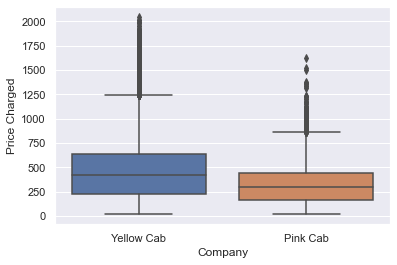

In [70]:
#Outlier Detection
sns.set(style = 'darkgrid')

plt = sns.boxplot(x="Company", 
                 y="Price Charged",
                 data=masterdata,
                 order=["Yellow Cab", "Pink Cab"])


From outlier detection, price charged for the Yellow Cab is higher compared to Pink Cab

In [25]:
#Check Correlation
masterdata.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.021289,-0.001060,-0.000935
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633
Customer ID,-0.021289,0.000389,-0.177324,0.003077,1.000000,-0.002161,-0.005834
Age,-0.001060,-0.000369,-0.003084,-0.000189,-0.002161,1.000000,-0.000573
Income (USD/Month),-0.000935,-0.000544,0.003228,-0.000633,-0.005834,-0.000573,1.000000


Text(0.5, 1.0, 'Correlation Heatmap Cab Investment Data", fontsize = 25')

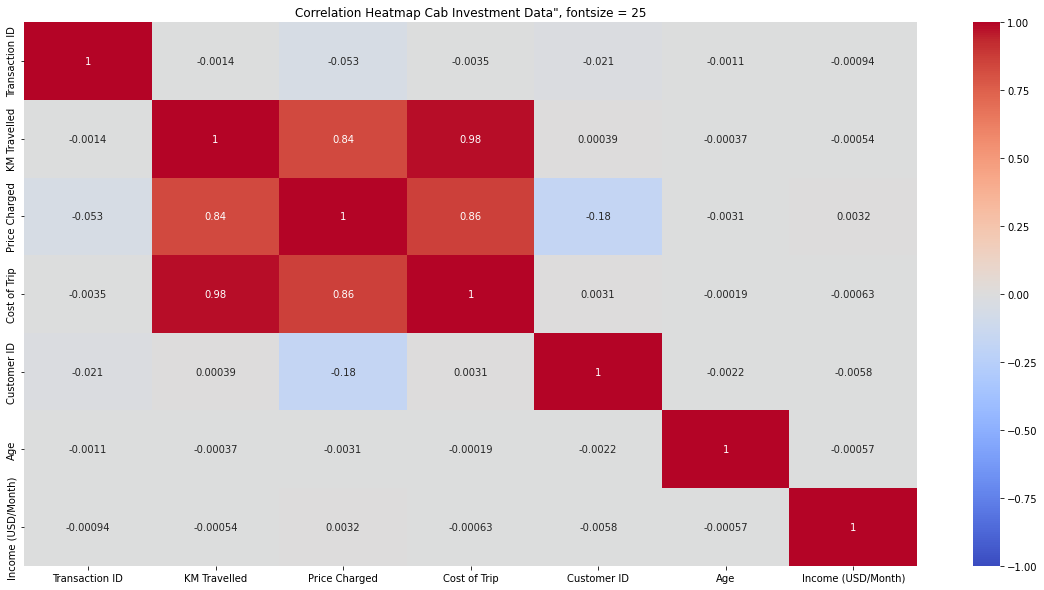

In [18]:
# Generate heatmap correlation
plt.figure(figsize=(20,10))
sns.heatmap(masterdata.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap="coolwarm")
plt.title('Correlation Heatmap Cab Investment Data", fontsize = 25')


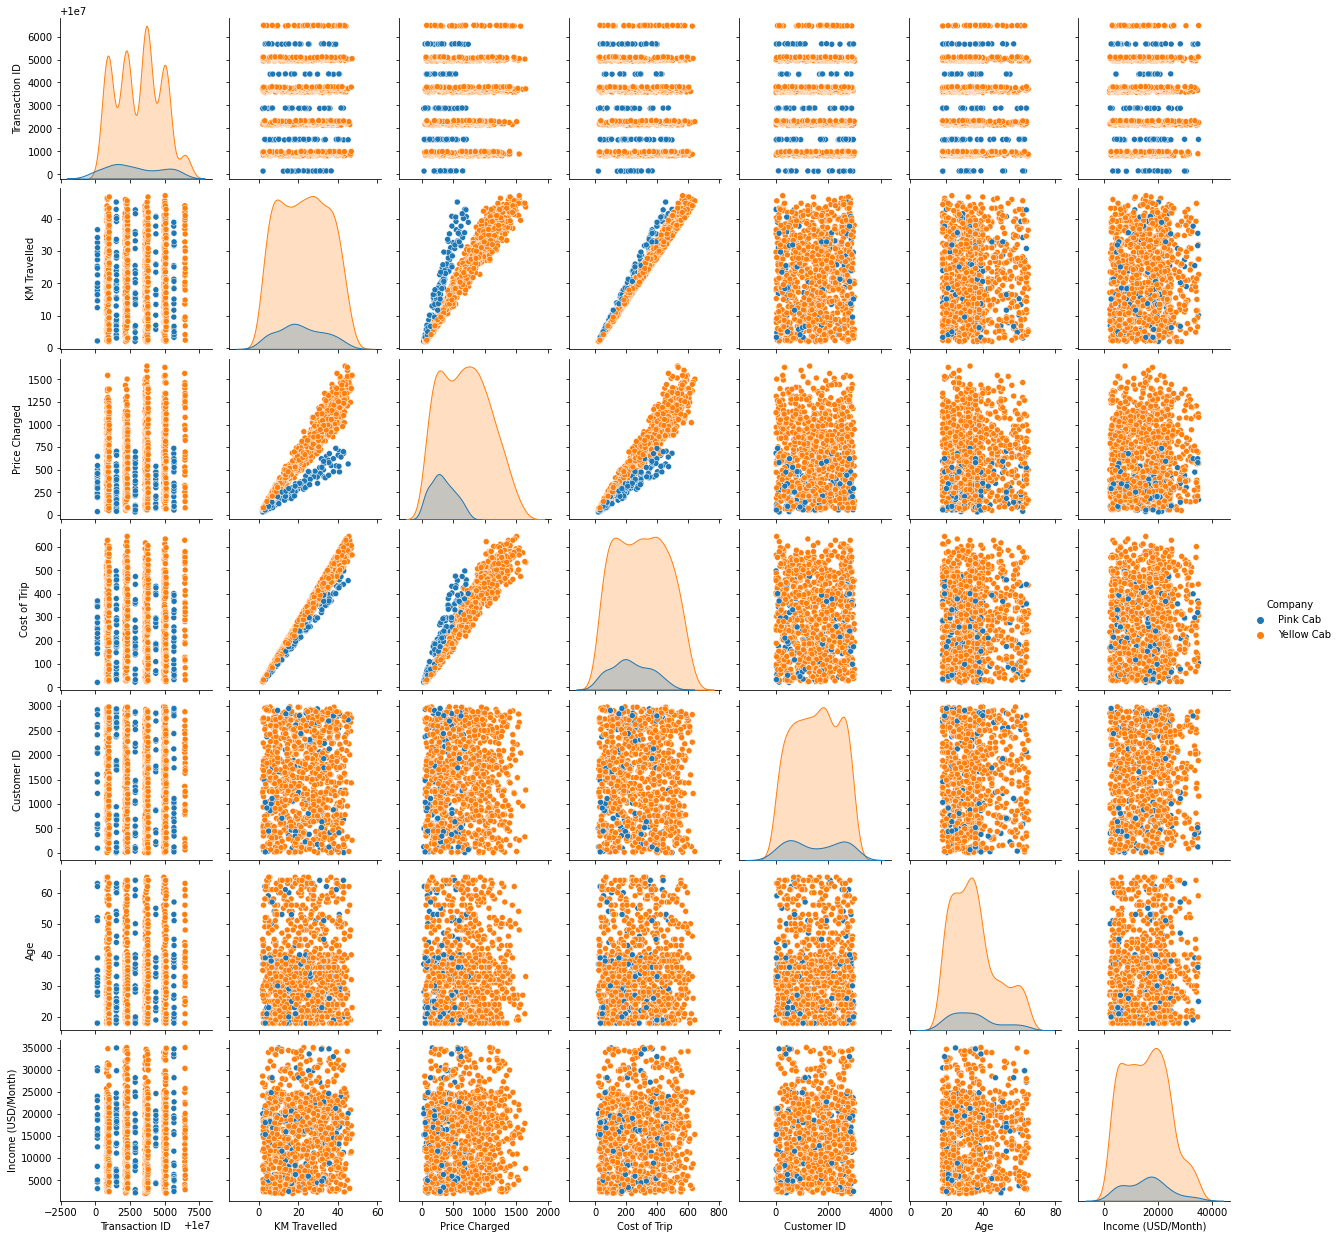

In [19]:
#Visualize Data
sns.pairplot(masterdata.head(1000), hue = 'Company')
plt.show()

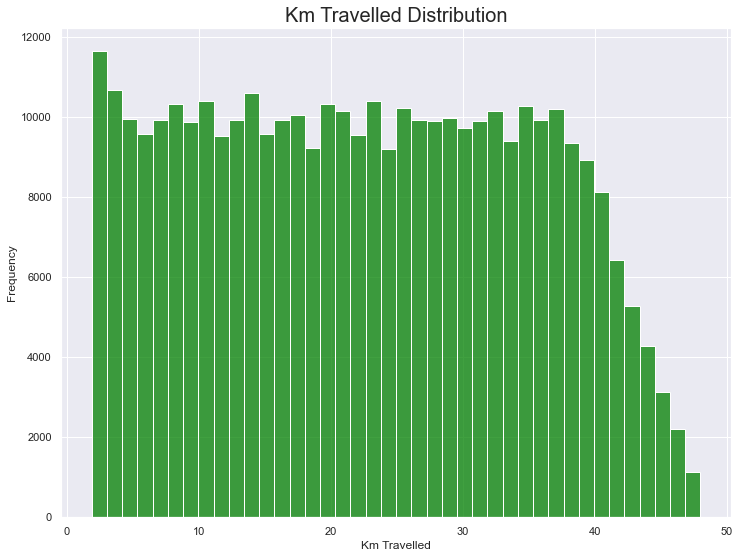

In [186]:
#KM Travelled Distribution
plt.figure(figsize=(12,9))
ax=sns.histplot(data=masterdata, x="KM Travelled",bins=40, color= 'green')
ax.set_title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

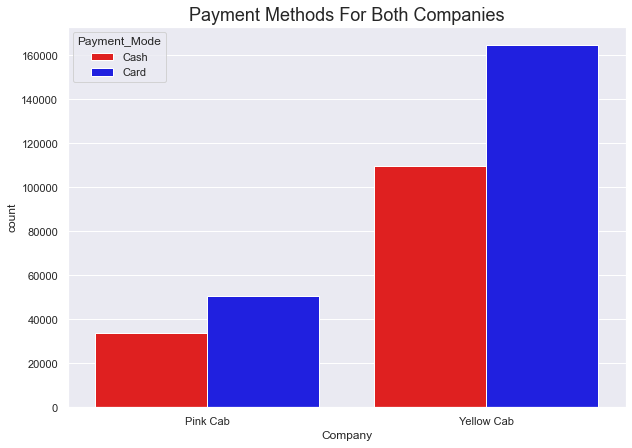

In [240]:
#Identify which payment method customers prefer to use, for each companyplt.figure(figsize = (16, 9))
plt.figure(figsize=(10,7))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=masterdata, palette=['red',"blue"])
plt.title('Payment Methods For Both Companies', fontsize=18)
plt.show()

